In [1]:
# Importing findspark
import findspark
findspark.init('/home/ec2-user/spark')

In [2]:
# Importing Pyspark
import pyspark
from pyspark import SparkContext

In [3]:
# Importing StreamingContext i.e., Entry point for all streaming functionalities
from pyspark.streaming import StreamingContext

In [4]:
# Now we create a local streaming context with 2 execution threads and batch interval of 1 second.
sc = SparkContext("local[2]", "NWC")
ssc = StreamingContext(sc,1)

In [5]:
# Now we are creating a DStream, that will listen to the TCP socket with port 9999
lines = ssc.socketTextStream("localhost",9999)

In [6]:
# Performing word count by splitting, mapping and reducing.. 
words = lines.flatMap(lambda line: line.split(" "))
pair = words.map(lambda word: (word,1))
wc = pair.reduceByKey(lambda x,y: x+y)
wc.pprint()  # To print the DStream type object we use pprint()

In [7]:
# Now plotting the graph of the word count..
import matplotlib.pyplot as plt

# Here we are defining a function that takes input as (time, rdd) sent by DStream object. 
# DStream object is a collection of RDDs (time+rdd)
def process(time,rdd):
    words=[]
    counts=[]
    for x in rdd.collect():
        words.append(x[0])
        counts.append(x[1])
    if len(words)>0 :
        plt.bar(words,counts)
        plt.show()


In [8]:
# Splitting DStream into RDD to perform operations..and DStream is (time+RDD) so for each RDD we are calling function.
wc.foreachRDD(process)

In [9]:
# Spark Streaming only sets up the computations that are to be performed till here. No real processing has been started yet.
ssc.start()  # This will start the Computations

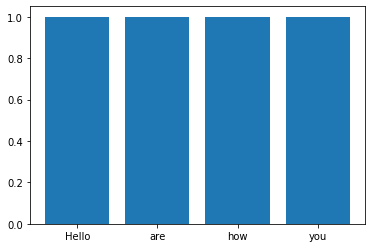

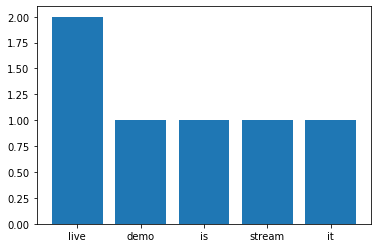

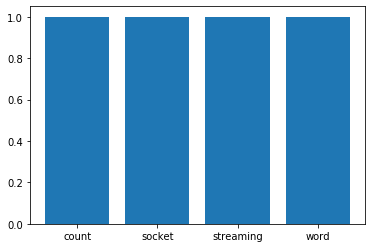

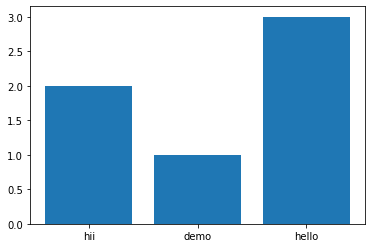

In [ ]:
# Waiting for the computations to terminate.
ssc.awaitTermination() 

In [ ]:
# stay tuned :)